<a href="https://colab.research.google.com/github/expely/Business-Analytics-Labs/blob/main/Assignments/assignment_04_StayJoseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

For this assignment, the variable `answered` is your target.  

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Think about if there are any outliers, missing values, or duplicates.  We will cover those topics next week.  

In [30]:
#Import the data
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv'
df = pd.read_csv(url)
print(df)

       answered  income female  age  job  num_dependents  rent  own_res  \
0             1   13520      0   23    0               1     1        0   
1             0   14780      0   22    2               1     0        1   
2             1   37570      0   62    2               1     0        0   
3             0   12450      0   33    2               1     0        1   
4             0   12400      0   48    1               2     0        0   
...         ...     ...    ...  ...  ...             ...   ...      ...   
29499         1   11630      0   44    2               1     0        1   
29500         0   28640      0   34    1               2     0        1   
29501         1   34480      0   74    1               1     0        1   
29502         1   10550      0   30    2               1     0        1   
29503         0  125790      0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  mobile  product  
0          0.0         0         2

In [31]:
#View the datatypes
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

In [32]:
#Describe the data
display(df.describe())
display(df.isnull().describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504,29504,29504,29504,29504,29504,29504,29504,29504,29504,29504,29504,29504,29504
unique,1,1,1,1,1,1,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,29504,29504,29504,29504,29504,29504,29504,29504,29502,29504,29504,29504,29504,29504


# Step 2: Begin to Explore the Data

We will learn more about Exploratory Data Analysis (EDA) in Week 5. The following steps are to help you connect the data visualization steps that we practiced last week with the process of data understanding - learning more about the dataset and finding the data quality issues that need to be addressed.   These are the first steps in EDA.

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

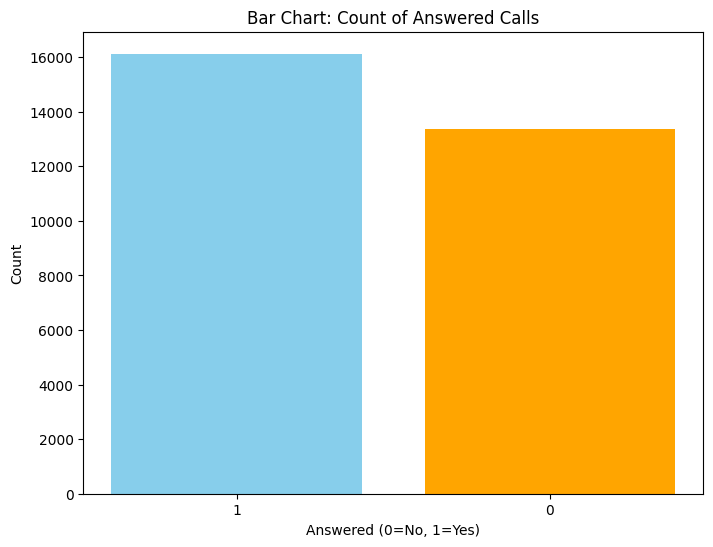

In [33]:
# Chart 1: Bar Chart of Target Variable (Answered)
counts = df['answered'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'orange'])
plt.title('Bar Chart: Count of Answered Calls')
plt.xlabel('Answered (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2317766910.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_0, data_1], labels=['No (0)', 'Yes (1)'])


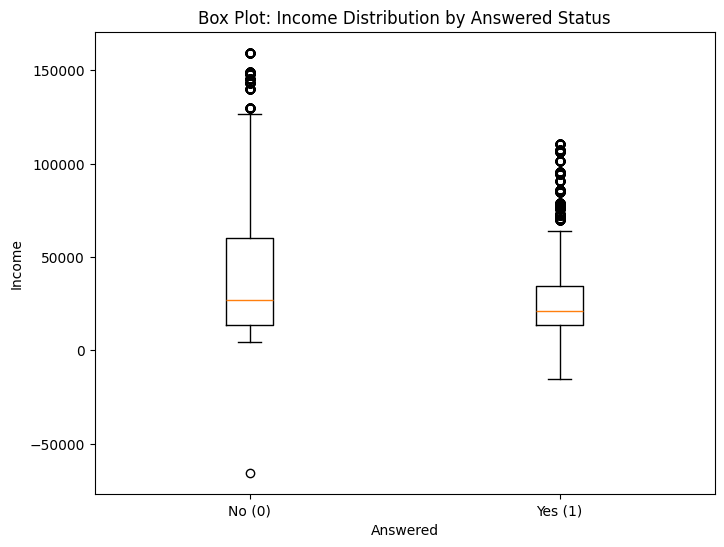

In [34]:
# Chart 2: Box Plot of Income by Answered Status
data_0 = df[df['answered'] == 0]['income']
data_1 = df[df['answered'] == 1]['income']

plt.figure(figsize=(8, 6))
plt.boxplot([data_0, data_1], labels=['No (0)', 'Yes (1)'])
plt.title('Box Plot: Income Distribution by Answered Status')
plt.xlabel('Answered')
plt.ylabel('Income')
plt.show()

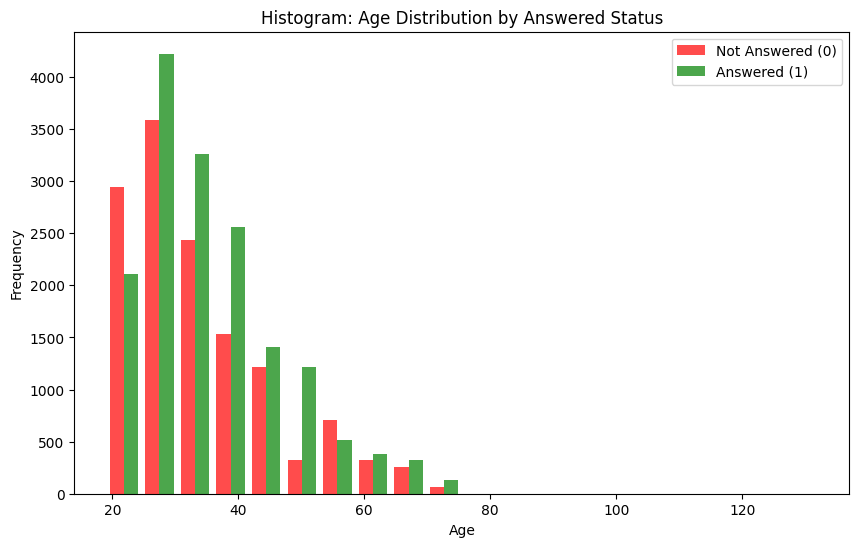

In [35]:
# Chart 3: Histogram of Age by Answered Status
data_0 = df[df['answered'] == 0]['age']
data_1 = df[df['answered'] == 1]['age']

plt.figure(figsize=(10, 6))
plt.hist([data_0, data_1], bins=20, label=['Not Answered (0)', 'Answered (1)'], color=['red', 'green'], alpha=0.7)
plt.title('Histogram: Age Distribution by Answered Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

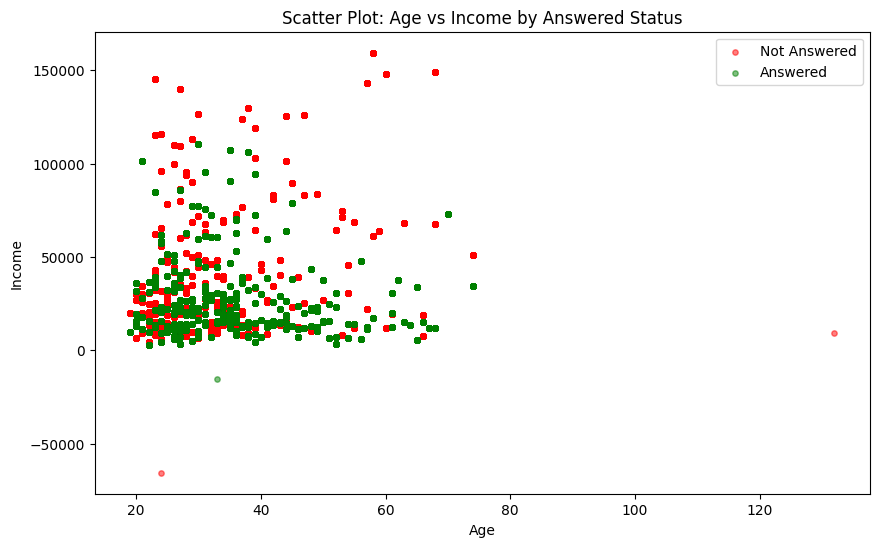

In [36]:
# Chart 4: Scatter Plot of Age vs Income colored by Answered Status
plt.figure(figsize=(10, 6))
colors = {0: 'red', 1: 'green'}
labels = {0: 'Not Answered', 1: 'Answered'}

for status in [0, 1]:
    subset = df[df['answered'] == status]
    plt.scatter(subset['age'], subset['income'], c=colors[status], label=labels[status], alpha=0.5, s=15)

plt.title('Scatter Plot: Age vs Income by Answered Status')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

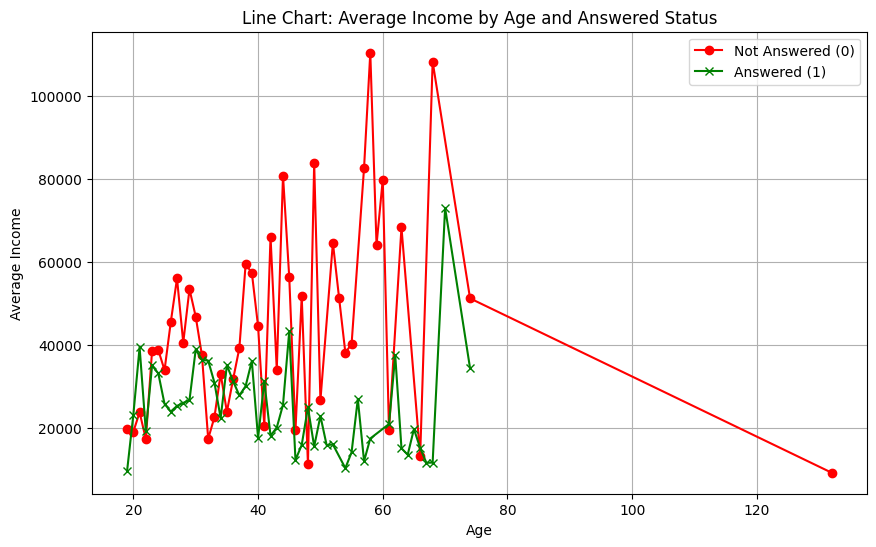

In [37]:
# Chart 5: Line Chart of Average Income by Age and Answered Status
avg_income_0 = df[df['answered'] == 0].groupby('age')['income'].mean()
avg_income_1 = df[df['answered'] == 1].groupby('age')['income'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_income_0.index, avg_income_0.values, label='Not Answered (0)', color='red', marker='o')
plt.plot(avg_income_1.index, avg_income_1.values, label='Answered (1)', color='green', marker='x')

plt.title('Line Chart: Average Income by Age and Answered Status')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Summarize Your Findings
Question 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

### ✍️ Your Response: 🔧
3.1. No, not all of the variables are useful. For instance, income seemed to have a very similar median for whether or not they answered the phone. However higher income was more likely to say no, so in that way it is useful. The biggest one is the product column though, since apart of it already tells you whether or not they called. So it isn't useful for predicting the answered variable.

Question 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

### ✍️ Your Response: 🔧
3.2. The number one issue is that the female column is not a number like it should be (0 or 1). It's an object instead of an int. The other issue is that there is missing data in the new_car. I would really like to know what time of the day/day of the week they were calling to see if we could somehow use their age/job in correlation with that to see.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [38]:
!jupyter nbconvert --to html "assignment_04_StayJoseph.ipynb"

[NbConvertApp] Converting notebook assignment_04_StayJoseph.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 556112 bytes to assignment_04_StayJoseph.html
